# Assignment 1


## Task 1

Download [House Prices Data Set](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (already in the needed format). The data set is used to predict house prices. Analyze the columns of the dataset


## Task 2

Read the dataset in the Pandas data frame. Remove the rows with a missing
value. Divide the training.csv into two sets of ratio 80:20 entitled to train and test set respectively.


In [1]:
! pip install pandas


In [2]:
import pandas as pd

TRAIN_DATASET_FILE_PATH = "../ML_DRIVE/Assign_1/train.csv"

house_prices_df = pd.read_csv(filepath_or_buffer=TRAIN_DATASET_FILE_PATH)

house_prices_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Hence the dataset has has 81 Columns


In [3]:
! pip install scikit-learn


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

required_data = house_prices_df[['LotArea',
                                 'SalePrice']].dropna()  # drop NA Values
train_data, test_data = train_test_split(
    required_data, test_size=0.2)  # Test Train Split

X_train = train_data[['LotArea']]
y_train = train_data['SalePrice']

model = LinearRegression()

model.fit(X_train, y_train)

slope = model.coef_
intercept = model.intercept_

print(f'SalePrice = {slope[0]} * LotArea + {intercept}')

# now checking test data performance
X_test = test_data[['LotArea']]
y_test = test_data['SalePrice']
y_predict = model.predict(X_test)


mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Square Error: {mse}")
print(f"R2 Score: {r2}")


SalePrice = 1.8459631953874558 * LotArea + 159762.98124120315
Mean Square Error: 7362868352.780711
R2 Score: 0.06334161904465174


## Task 4

Use the multiple regression method to estimate the value of the weights/coefficients for predicting 'SalePrice' based on the following features:
 1. Model 1: LotFrontage, LotArea 
 2. Model 2: LotFrontage, LotArea, OverallQual, OverallCond 
 3. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea

## Task 5

Calculate and compare the Mean squared Error, R2 score for each of the
model for test and training set for the above models.


### Approach

As only labels to be used are getting changed, we can make a function to abstract away all the processing


In [5]:
from random import randint
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


def __one_hot_encode(X: pd.DataFrame, col_name: str) -> pd.DataFrame:
    encoder = OneHotEncoder()

    encoded_df = pd.DataFrame(
        encoder.fit_transform(X[[col_name]]).toarray(),
        columns=encoder.get_feature_names_out()
    )

    X = X.join(encoded_df)
    X = X.drop(col_name, axis=1)

    return X

# Help: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

def runRegressionModel(
    df: pd.DataFrame,
    X_labels_numeric: list[str],
    y_label: str,
    X_labels_categoric: list[str] = [],
    test_frac=0.2
) -> tuple[LinearRegression,int, int]:
    '''
    Runs Regression Model on df DataFrame, with X_labels, X_labels_categoric
    and y_label

    Applies OneHotEncoding on the labels in X_labels_categoric

    Removes all the NaN values and does test-train split based on test_frac

    NOTE: don't add categoric labels to X_labels_numeric

    Parameters:
            df (pandas.DataFrame): DataFrame from which X_labels and y_labels\
           will be taken
           X_labels (list[str]): list of labels whose data taken from df
           y_label (str): the label which the model will predict
           test_frac: what fraction of data do you want for testing
    Returns:
        MSE and R2 Score of the model trained
    '''
    # drop NA Values
    required_data = df[
        [*X_labels_numeric, *X_labels_categoric, y_label]
    ].dropna()

    # get X and y
    X = required_data[[*X_labels_numeric, *X_labels_categoric]]
    y = required_data[[y_label]]

    # convert categoric fields
    for col_name in X_labels_categoric:
        X = __one_hot_encode(X, col_name)

    # Test Train Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_frac, random_state=randint(0, 100)
    )

    # train model
    model = LinearRegression().fit(X_train, y_train)

    # now checking test data performance
    y_predict = model.predict(X_test)

    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    return model, mse, r2


In [6]:
model_1, model_1_mse, model_1_r2 = runRegressionModel(
    house_prices_df,
    ['LotArea', 'LotFrontage'],
    'SalePrice',
    test_frac=0.2
)

print(f"Model 1 -> mse: {model_1_mse}\tr2: {model_1_r2}")

model_2, model_2_mse, model_2_r2 = runRegressionModel(
    house_prices_df,
    ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond'],
    'SalePrice',
    test_frac=0.2
)

print(f"Model 2 -> mse: {model_2_mse}\tr2: {model_2_r2}")

model_3, model_3_mse, model_3_r2 = runRegressionModel(
    house_prices_df,
    ['LotArea', 'LotFrontage', 'OverallQual',
        'OverallCond', '1stFlrSF', 'GrLivArea'],
    'SalePrice',
    test_frac=0.2
)

print(f"Model 3 -> mse: {model_3_mse}\tr2: {model_3_r2}")


Model 1 -> mse: 7314940386.456778	r2: 0.05420285177285766
Model 2 -> mse: 2394221823.901155	r2: 0.6581618274851035
Model 3 -> mse: 2298778245.624584	r2: 0.6954484006544848


We see that mse decreases and r2 increases as we can say that as we keep adding more parameters, the model can better understand the data and hence gives better predictions

## Task 6

Use the multiple regression method to estimate the value of the weights/coefficients for predicting 'SalePrice' based on the following set of mixed ( numerical and categorical) features:

1.  Model 4: LotArea, Street
2.  Model 5: LotArea, OverallCond, Street, Neighborhood
3.  Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year


In [11]:
model_4, model_4_mse, model_4_r2 = runRegressionModel(
    house_prices_df,
    X_labels_numeric=['LotArea'],
    X_labels_categoric=['Street'],
    y_label='SalePrice',
    test_frac=0.2
)
print(f"Model 4 -> mse: {model_4_mse}\tr2: {model_4_r2}")

model_5, model_5_mse, model_5_r2 = runRegressionModel(
    house_prices_df,
    X_labels_numeric=['LotArea', 'OverallCond'],
    X_labels_categoric=['Street', 'Neighborhood'],
    y_label='SalePrice',
    test_frac=0.2
)
print(f"Model 5 -> mse: {model_5_mse}\tr2: {model_5_r2}")

model_6, model_6_mse, model_6_r2 = runRegressionModel(
    house_prices_df,
    X_labels_numeric=['LotArea', 'OverallCond', '1stFlrSF'],
    X_labels_categoric=['Street', 'Neighborhood'],
    y_label='SalePrice',
    test_frac=0.2
)
print(f"Model 6 -> mse: {model_6_mse}\tr2: {model_6_r2}")


Model 4 -> mse: 5959327765.79035	r2: 0.06877262233823989
Model 5 -> mse: 2531639372.914825	r2: 0.6042444028958256
Model 6 -> mse: 1964629621.4787848	r2: 0.6767652564166822


## Task 7
Compare the feature “LotArea” weights/coefficients for all the six trained models and plot a graph using the Matplotlib library.

In [8]:
! pip install matplotlib

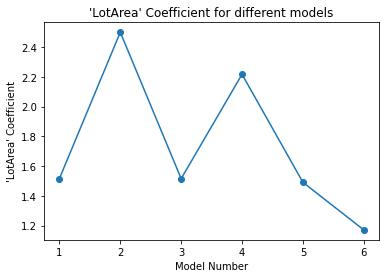

In [12]:
import matplotlib.pyplot as plt

x_axis = range(1, 7)
y_axis = [model_1.coef_[0][0], model_2.coef_[0][0],
          model_3.coef_[0][0], model_4.coef_[0][0],
          model_5.coef_[0][0], model_6.coef_[0][0]]

plt.plot(x_axis, y_axis, "o-")  # blue dot and line in between
plt.ylabel("'LotArea' Coefficient")
plt.xlabel("Model Number")
plt.title("'LotArea' Coefficient for different models")
plt.show()

## Task 8
Use the polynomial regression of degree (2 and 3), to estimate the value of the weights/coefficients for predicting 'SalePrice' based on 'LotArea'. Print the graph on the training and test set (Bonus).

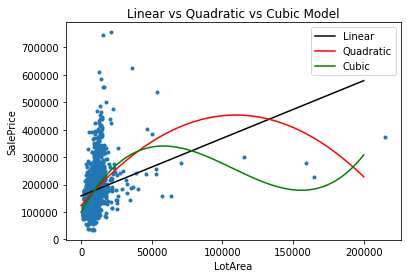

In [10]:
# polynomial form -> y = ax + bx^2 + cx^3 + d

# To not warn me while making new data
# Example: "df[df['A'] > 2]['B'] = new_val" will edit the DataFrame and will give warning
pd.options.mode.chained_assignment = None  # default='warn'

y = house_prices_df[['SalePrice']]
X = house_prices_df[['LotArea']]

#plot actual data
plt.plot(X['LotArea'], y, '.')

x_axis = range(0, 200000, 100)

linear_model = LinearRegression().fit(X, y)
linear_model_coeff = linear_model.coef_
linear_model_intercept = linear_model.intercept_
curve_linear_model = [linear_model_coeff[0][0]*x  + linear_model_intercept for x in x_axis]
plt.plot(x_axis, curve_linear_model, 'black', label='Linear')

X['LotArea_square'] = house_prices_df[['LotArea']] ** 2
square_model = LinearRegression().fit(X, y)
square_model_coeff = square_model.coef_
square_model_intercept = square_model.intercept_
curve_square_model = [square_model_coeff[0][0]*x + square_model_coeff[0]
                      [1]*(x**2) + square_model_intercept for x in x_axis]
plt.plot(x_axis, curve_square_model, 'r', label= "Quadratic")

X['LotArea_cubed'] = house_prices_df[['LotArea']] ** 3
cubic_model = LinearRegression().fit(X, y)
cubic_model_coeff = cubic_model.coef_
cubic_model_intercept = cubic_model.intercept_
curve_cubic_model = [cubic_model_coeff[0][0]*x + cubic_model_coeff[0][1] * \
                     (x**2) + cubic_model_coeff[0][2] * (x ** 3) + cubic_model_intercept for x in x_axis]
plt.plot(x_axis, curve_cubic_model, 'g', label="Cubic")


plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear vs Quadratic vs Cubic Model')
plt.legend()

plt.show()
